**BINARY CLASSIFICATION**

In [1]:
import pandas as pd
ion = pd.read_csv('../../../data/ion.csv', index_col=0)
display(ion.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [2]:
df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
  layers.Dense(4, activation='relu', input_shape=[33]),
  layers.Dense(4, activation='relu'),
  layers.Dense(1, activation='sigmoid'),
])

/Users/asaucedo/workspaces/python3/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/asaucedo/workspaces/python3/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['binary_accuracy'],
)

In [5]:
early_stopping = keras.callbacks.EarlyStopping(
  patience=10,
  min_delta=0.001,
  restore_best_weights=True,
)
history = model.fit(
  X_train, y_train,
  validation_data=(X_valid, y_valid),
  batch_size=512,
  epochs=1000,
  callbacks=[early_stopping],
)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - binary_accuracy: 0.6138 - loss: 0.6924 - val_binary_accuracy: 0.7619 - val_loss: 0.6927
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - binary_accuracy: 0.6138 - loss: 0.6922 - val_binary_accuracy: 0.7619 - val_loss: 0.6924
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - binary_accuracy: 0.6260 - loss: 0.6919 - val_binary_accuracy: 0.7619 - val_loss: 0.6921
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - binary_accuracy: 0.6301 - loss: 0.6917 - val_binary_accuracy: 0.7714 - val_loss: 0.6918
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - binary_accuracy: 0.6301 - loss: 0.6914 - val_binary_accuracy: 0.7714 - val_loss: 0.6915
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - binary_accuracy: 0.6301 - loss: 0.6911 - val_binary_accuracy: 0.7810 - val_loss: 0.6912
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - binary_accuracy: 0.6341 - loss: 0.6908 - val_binary_accuracy: 0.7905 - val_loss: 0.6908
Epoch 8/1000

<Axes: >

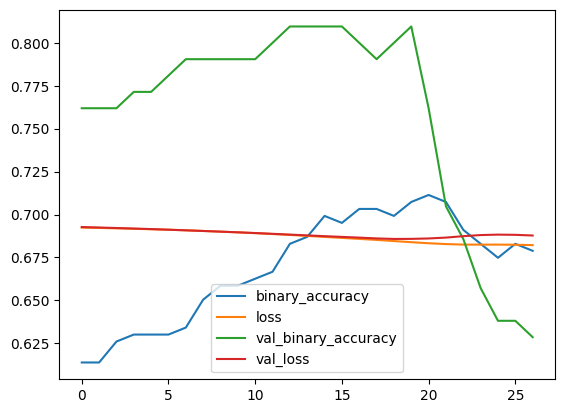

In [6]:
history_df = pd.DataFrame(history.history)
history_df.plot()